# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE 
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/kaggle/input/cardataset/data.csv')

In [3]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# EDA and Data visualisation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
x = df.Year.value_counts().sort_index()
x

Year
1990      38
1991      59
1992      85
1993      91
1994      60
1995      57
1996      56
1997      60
1998      32
1999      45
2000      60
2001      66
2002      71
2003      88
2004      91
2005      92
2006     111
2007     233
2008     205
2009     284
2010     229
2011     230
2012     309
2013     314
2014     501
2015    1681
2016    1672
2017    1264
Name: count, dtype: int64

In [8]:
import plotly.io as pio
pio.templates.default = "plotly_dark"
fig = px.line(x=x.index, y=x.values, labels={'x': 'Year', 'y': 'Values'})

# Customize layout to show all years from 1990 to 2017
fig.update_layout(
    xaxis_title="Years",
    yaxis_title="Values",
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1990, 2018))  # Show all years from 1990 to 2017
    ),
    font=dict(
        family="Arial, sans-serif",
        size=15,
        color="LightGray"
    )
)

# Show the plot
fig.show()


In [9]:
df.Year = 2024-df.Year

/tmp/ipykernel_16/4083956387.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



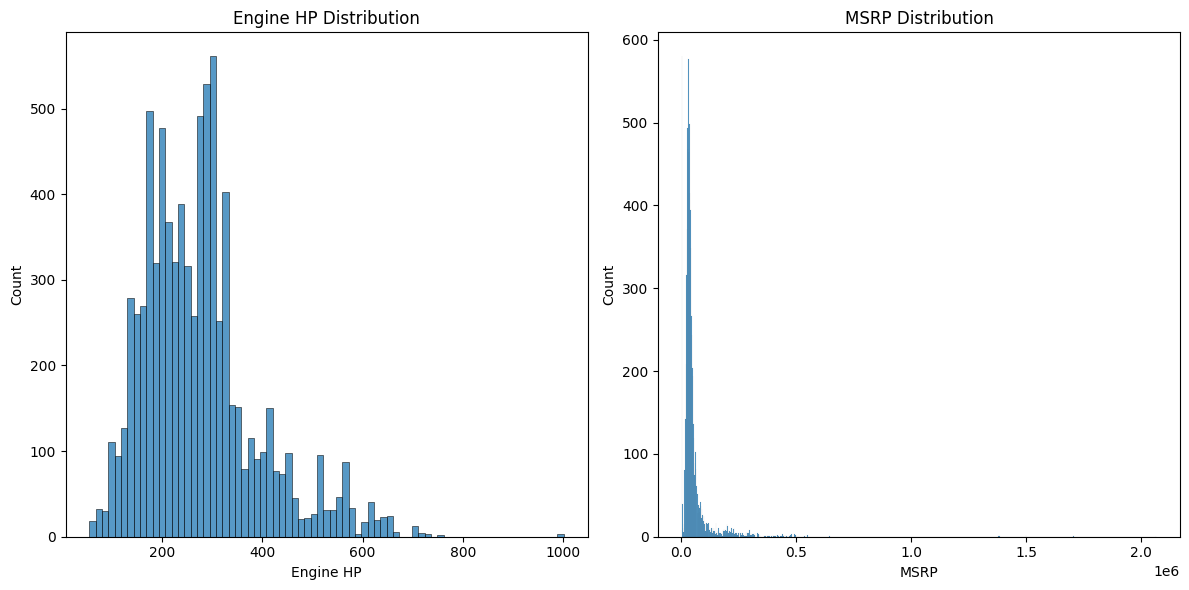

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['Engine HP'], ax=axs[0])
axs[0].set_title('Engine HP Distribution')
sns.histplot(df['MSRP'], ax=axs[1])
axs[1].set_title('MSRP Distribution')
plt.tight_layout()
plt.show()

### Outliers where detected for the Engine hoursepowers and MSRP

In [11]:
def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25) 
    q3 = df[col_name].quantile(0.75)  
    iqr = q3 - q1
    df_filtered = df[(df[col_name] >= q1 - 1.5 * iqr) & (df[col_name] <= q3 + 1.5 * iqr)]
    return df_filtered

df = remove_outliers(df, 'Engine HP')
df = remove_outliers(df, 'MSRP')
df = remove_outliers(df, 'Popularity')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



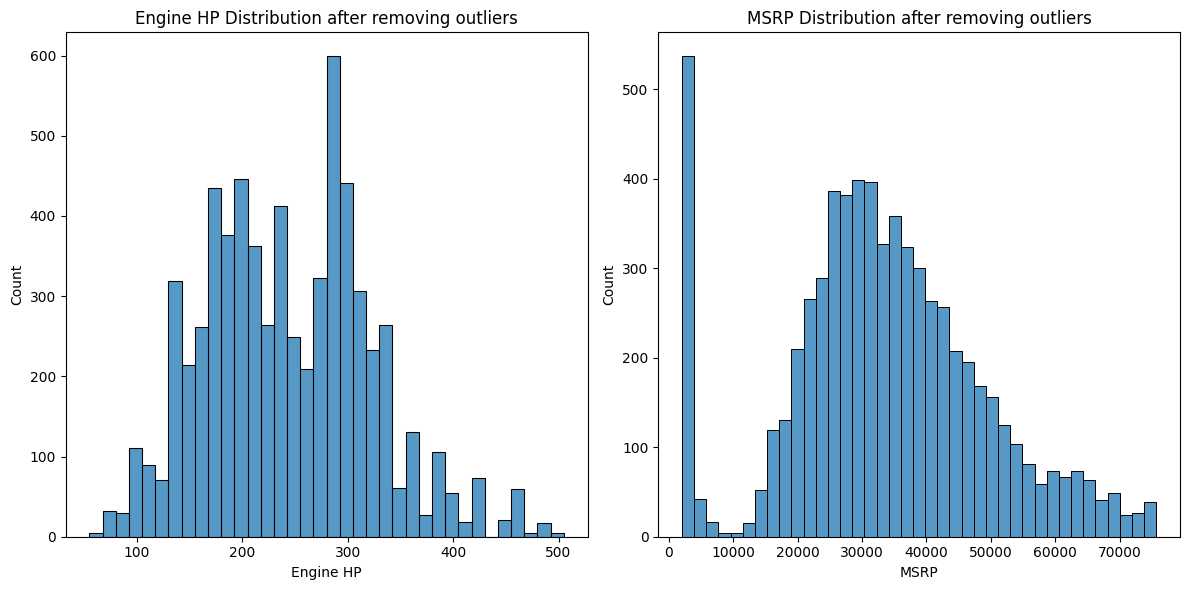

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['Engine HP'], ax=axs[0])
axs[0].set_title('Engine HP Distribution after removing outliers')
sns.histplot(df['MSRP'], ax=axs[1])
axs[1].set_title('MSRP Distribution after removing outliers')
plt.tight_layout()
plt.show()

In [13]:
df['Engine Fuel Type'] = df['Engine Fuel Type'].replace({
    'premium unleaded (recommended)': 'premium unleaded',
    'premium unleaded (required)': 'premium unleaded',
    'flex-fuel (premium unleaded recommended/E85)': 'premium unleaded',
    'flex-fuel (premium unleaded required/E85)': 'premium unleaded',
})

<Axes: xlabel='Vehicle Style', ylabel='Values'>

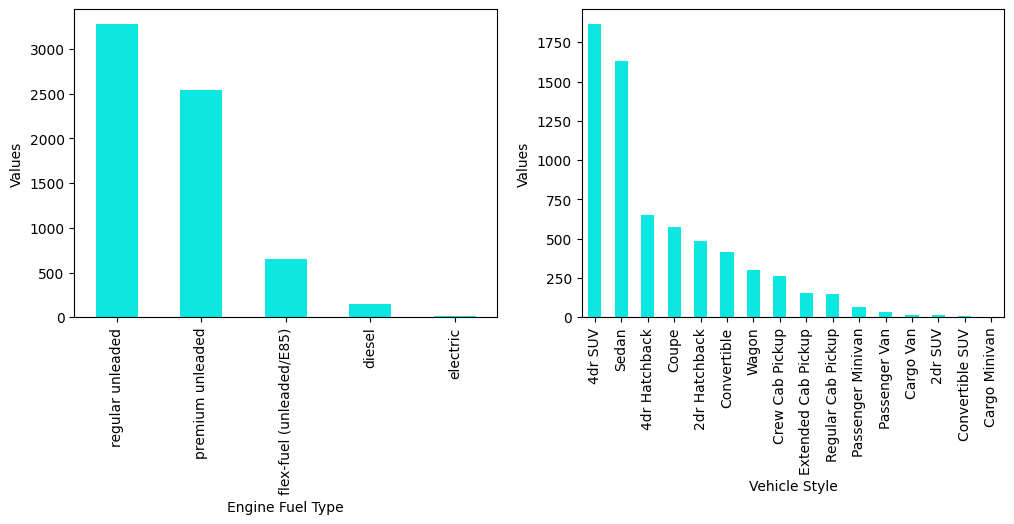

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4)) 
df['Engine Fuel Type'].value_counts().plot(kind = 'bar',color= '#0ce8e1',ylabel ='Values',ax = axs[0])
df['Vehicle Style'].value_counts().plot(kind = 'bar',color= '#0ce8e1',ylabel ='Values',ax = axs[1])

In [15]:
df['Engine Fuel Type'].value_counts()

Engine Fuel Type
regular unleaded            3279
premium unleaded            2540
flex-fuel (unleaded/E85)     649
diesel                       149
electric                      13
Name: count, dtype: int64

In [16]:
df['Transmission Type'].value_counts()

Transmission Type
AUTOMATIC           4815
MANUAL              1403
AUTOMATED_MANUAL     394
DIRECT_DRIVE          15
UNKNOWN                3
Name: count, dtype: int64

In [17]:
df= df[df['Transmission Type'] != 'UNKNOWN']

<Axes: ylabel='count'>

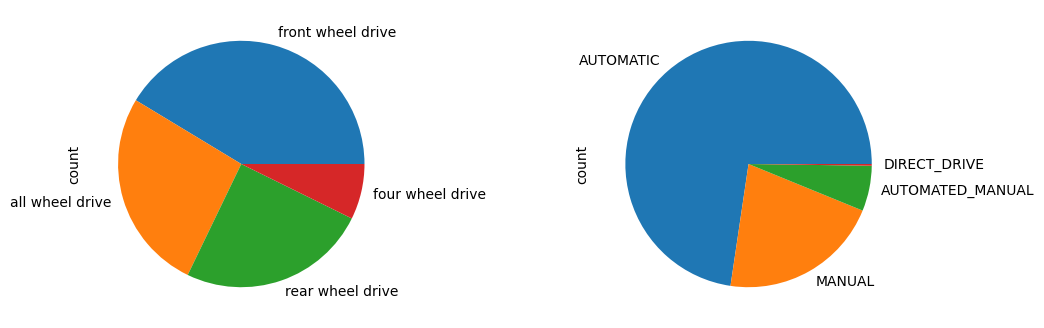

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4)) 
df['Driven_Wheels'].value_counts().plot(kind = 'pie',color= '#0ce8e1',ax = axs[0])
df['Transmission Type'].value_counts().plot(kind = 'pie',color= '#0ce8e1',ax = axs[1])

# Data Preprocessing

In [19]:
for i in list(df.select_dtypes(include=['object'])):
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

<Axes: >

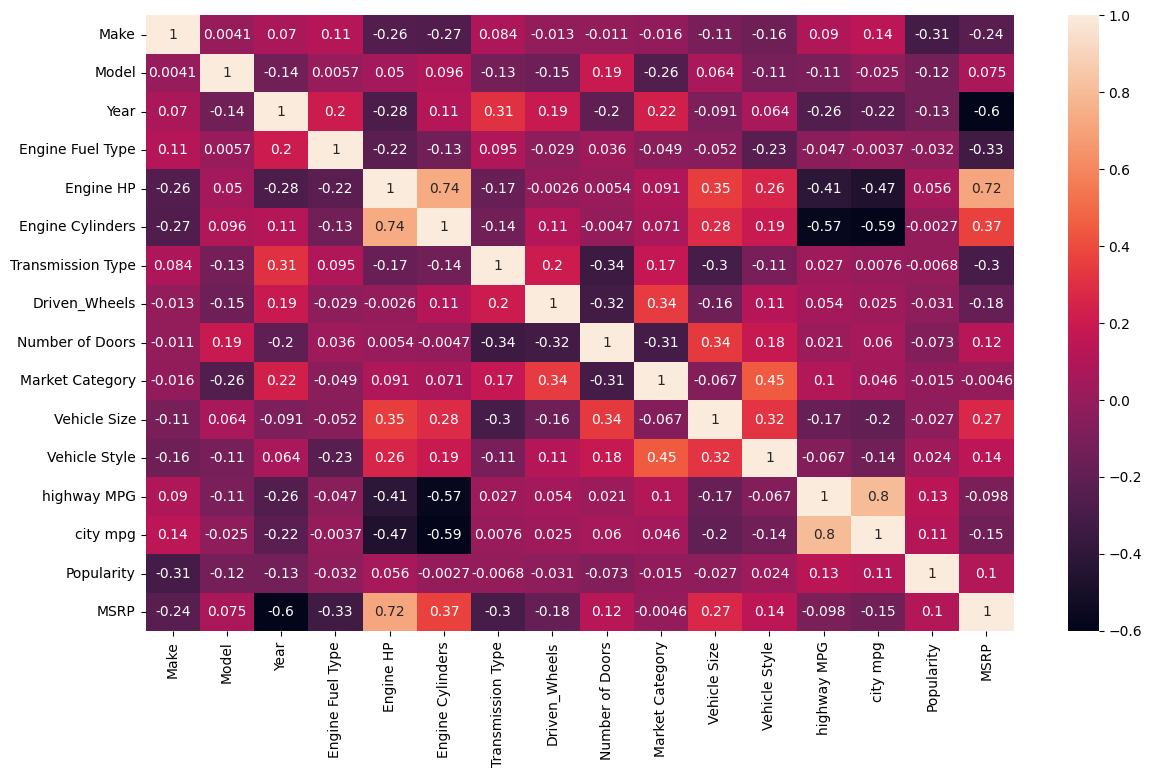

In [20]:
fig = plt.figure(figsize= (14,8))
sns.heatmap(df.corr(),annot = True)

In [21]:
x = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state = 42)

In [23]:
x_train

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
6047,35,282,11,3,170.0,4.0,0,2,4.0,46,2,14,48,42,873
9370,10,458,8,2,285.0,6.0,1,1,2.0,28,1,13,22,17,549
6754,3,307,23,3,315.0,6.0,3,3,2.0,25,0,6,23,15,3916
10077,27,477,32,4,100.0,4.0,3,2,2.0,35,0,0,29,20,535
4425,24,194,30,4,136.0,4.0,3,2,4.0,35,0,2,25,19,436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,0,317,7,3,290.0,6.0,1,2,4.0,14,2,3,27,20,204
9443,6,462,17,2,295.0,8.0,1,1,4.0,28,1,9,17,13,1385
9488,6,463,12,4,332.0,8.0,1,3,4.0,46,1,9,23,20,1385
9751,14,466,7,4,245.0,4.0,1,2,4.0,53,2,14,31,22,1439


In [24]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
sc2 = StandardScaler()
y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
y_test  = sc2.transform(y_test.values.reshape(-1,1))

# Evaluating models' performance

### Hyperparameter tuning for SVR model

In [25]:
svr = SVR()
param_grid = {
    'C': [0.1, 1, 10, 20],
    'epsilon': [0.001,0.1, 0.2],
    'gamma':['auto' , 'scale']
}
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(x_train, y_train.ravel()) 
p= grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [26]:
models =[ RandomForestRegressor(n_estimators = 200) , SVR(C = p['C'], epsilon = p['epsilon'] , gamma  = p['gamma']) ,XGBRegressor() , DecisionTreeRegressor(),LinearRegression()]

In [27]:
scores =[]
model_names = ["RandomForest" , "SVR" ,"XGBRegressor", 'DecisionTreeRegressor' , 'LinearRegression']
for i in models:
    model = i
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

/tmp/ipykernel_16/511095808.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [28]:
import plotly.express as px
import plotly.io as pio

# Set the default template
pio.templates.default = "plotly_dark"

# Create a line plot
fig = px.line(x=model_names, y=scores, labels={'x': 'Model Names', 'y': 'Scores'})
fig.update_layout(
    xaxis_title="Model Names",
    yaxis_title="Scores",
    title="Model Performance Comparison",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    margin=dict(l=120),
    showlegend=False
)

# Show the plot
fig.show()
